In [210]:
import os
import re
import pandas as pd

In [211]:
folder_path = 'data_raw'
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
dfs = []
for file in json_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_json(file_path)
    dfs.append(data)
df_temp = pd.concat(dfs, ignore_index=True)

In [212]:
df = df_temp.copy()

In [213]:
df['attendance'] = df['attendance'].apply(lambda x: str(x).split('[')[0].replace(',',''))

In [214]:
df['score'] = df['score'].apply(lambda x: x.replace('–','-').split('[')[0].split('(')[0].strip().replace('\n','').replace(' ',''))

In [215]:
def denumber(x):
    if isinstance(x, str):
        while x[-1] in ['0','1','2','3','4','5','6','7','8','9']:
            x = x[:-1]
        return x.strip()
    else:
        return x

In [216]:
def tell_competition(x):
    x = str(x)
    if "Cup Winners" in x:
        return "CWC"
    elif ("European Cup" in x) and ('Winners') not in x:
        return "UCL"
    elif "Champions League" in x:
        return "UCL"
    elif ("UEFA Cup" in x) and ('Winners') not in x:
        return "EL"
    elif "Europa League" in x:
        return "EL"
    elif "Conference League" in x:
        return "UECL"
    elif "Inter-Cities Fairs Cup" in x:
        return "ICFC"
    elif "Intertoto" in x:
        return "Intertoto"
    else:
        print(x)
        return None

In [217]:
def tell_season(x):
    x = str(x)
    try:
        season = re.search('\d{4}–{0,1}\d{0,4}',x).group()
        season = season.replace('–','-')
        if len(season) == 9:
            season = season[0:5] + season[-2:]
        elif len(season) == 4:
            season = f"{int(season) - 1}-{season[-2:]}"
        return season
    except:
        return None

In [218]:
df['competitonOriginal'] = df['competition']

In [219]:
df['competition'] = df['competitonOriginal'].apply(lambda x: tell_competition(x))

In [220]:
df['season'] = df['competitonOriginal'].apply(lambda x: tell_season(x))

In [221]:
df['location'] = df['location'].apply(lambda x: denumber(x))

In [222]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['estimatedDate'] = pd.to_datetime(df['estimatedDate'], errors='coerce')

In [223]:
df['attendance'] = df['attendance'].apply(lambda x: str(x).replace(' ',''))

In [224]:
df['attendance'] = pd.to_numeric(df['attendance'], errors='coerce')

In [225]:
df = df.drop_duplicates()

In [226]:
df = df.replace("1932-04-14","1966-04-14")
df = df.replace('Georgia (country)','Georgia')

In [227]:
df.loc[df['homeTeamUrl'] == 'Bohemian_F.C.', 'homeTeam'] = 'Bohemian F.C.'
df.loc[df['awayTeamUrl'] == 'Bohemian_F.C.', 'awayTeam'] = 'Bohemian F.C.'
df.loc[(df['homeTeam'].str.contains('Bohemia',na=False)) & (df['homeTeamCountry'] == 'Republic of Ireland'), 'homeTeam'] = 'Bohemian F.C.'
df.loc[(df['awayTeam'].str.contains('Bohemia',na=False)) & (df['awayTeamCountry'] == 'Republic of Ireland'), 'awayTeam'] = 'Bohemian F.C.'

In [228]:
df = df[df['homeTeam'] != 'TBD']
df = df[df['awayTeam'] != 'TBD']
df = df[df['homeTeam'] != '']
df = df[df['awayTeam'] != '']
df = df[df['score'] != 'Cancelled']
df = df[df['score'] != 'v']

In [229]:
df.groupby('score').size().nlargest(100).tail(50)

score
0-3Awarded                11
9-1                       10
5-4                        7
8-2                        6
-                          6
2-7                        6
10-1                       6
11-0                       5
3-0Awarded                 5
3-6                        5
0-9                        5
7-3                        3
1-8                        3
10-2                       3
3                          2
n/a                        2
Annulled                   2
9-2                        2
0-10                       2
8-3                        2
1-10                       2
w/o                        2
16-1                       2
12-0                       2
2-8                        2
2-12                       2
13-0                       2
0-1Awarded                 1
2-9                        1
Matchunplayed              1
Abandoned                  1
2-10                       1
0-11                       1
8-4                        1
3-7     

In [230]:
df[df['phase'] == 'Summary']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season
14372,EL,2004-09-16,5-0,GAK,Austria,Grazer_AK,Litex Lovech,Bulgaria,PFC_Litex_Lovech,"Arnold Schwarzenegger Stadium, Graz",Summary,4011.0,NaT,2004%E2%80%9305 UEFA Cup first round,2003-04
14373,EL,2004-09-16,0-3,Metalurh Donetsk,Ukraine,FC_Metalurh_Donetsk,Lazio,Italy,S.S._Lazio,"Shakhtar Stadium, Donetsk",Summary,18000.0,NaT,2004%E2%80%9305 UEFA Cup first round,2003-04
14374,EL,2004-09-16,1-1,Bodø/Glimt,Norway,FK_Bod%C3%B8/Glimt,Beşiktaş,Turkey,Be%C5%9Fikta%C5%9F_J.K.,"Aspmyra Stadion, Bodø",Summary,4196.0,NaT,2004%E2%80%9305 UEFA Cup first round,2003-04
14375,EL,2004-09-16,2-2,Shelbourne,Republic of Ireland,Shelbourne_F.C.,Lille,France,Lille_OSC,"Lansdowne Road, Dublin",Summary,7463.0,NaT,2004%E2%80%9305 UEFA Cup first round,2003-04
14376,EL,2004-09-16,3-1,Heart of Midlothian,Scotland,Heart_of_Midlothian_F.C.,Braga,Portugal,S.C._Braga,"Murrayfield Stadium, Edinburgh",Summary,18203.0,NaT,2004%E2%80%9305 UEFA Cup first round,2003-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18982,UCL,2011-08-24,1-2,Udinese,Italy,Udinese_Calcio,Arsenal,England,Arsenal_F.C.,"Stadio Friuli, Udine",Summary,26031.0,NaT,2011%E2%80%9312 UEFA Champions League qualifyi...,2010-11
18983,UCL,2011-08-17,2-0,Bayern Munich,Germany,FC_Bayern_Munich,Zürich,Switzerland,FC_Z%C3%BCrich,"Allianz Arena, Munich",Summary,66000.0,NaT,2011%E2%80%9312 UEFA Champions League qualifyi...,2010-11
18984,UCL,2011-08-23,0-1,Zürich,Switzerland,FC_Z%C3%BCrich,Bayern Munich,Germany,FC_Bayern_Munich,"Letzigrund, Zürich",Summary,23600.0,NaT,2011%E2%80%9312 UEFA Champions League qualifyi...,2010-11
18985,UCL,2011-08-16,3-1,Lyon,France,Olympique_Lyonnais,Rubin Kazan,Russia,FC_Rubin_Kazan,"Stade de Gerland, Lyon",Summary,35468.0,NaT,2011%E2%80%9312 UEFA Champions League qualifyi...,2010-11


In [231]:
df['phase'] = df['phase'].apply(lambda x: str(x).lower().replace('–','-'))

In [232]:
def desummary(row):
    if row['phase'] not in ['summary','teams','notes','match','matches','none','nan']:
        return row['phase']
    else:
        if 'League' in row['competition']:
            return row['competition'].split('League')[1].strip()
        elif 'Cup' in row['competition']:
            return row['competition'].split('Cup')[1].strip()

In [233]:
df['phase'] = df.apply(lambda x: desummary(x), axis=1)

In [234]:
df.groupby('phase').size()

phase
champions path              253
details                       2
final                       206
final round                   3
finals                       60
first qualifying round      348
first round                4916
fourth round                 64
group 1                      30
group 10                     30
group 11                     30
group 12                     30
group 2                      30
group 3                      30
group 4                      30
group 5                      30
group 6                      30
group 7                      30
group 8                      30
group 9                      30
group a                     717
group b                     720
group c                     680
group d                     684
group e                     590
group f                     590
group g                     566
group h                     566
group i                     144
group j                     144
group k                     144
gr

<Axes: xlabel='season'>

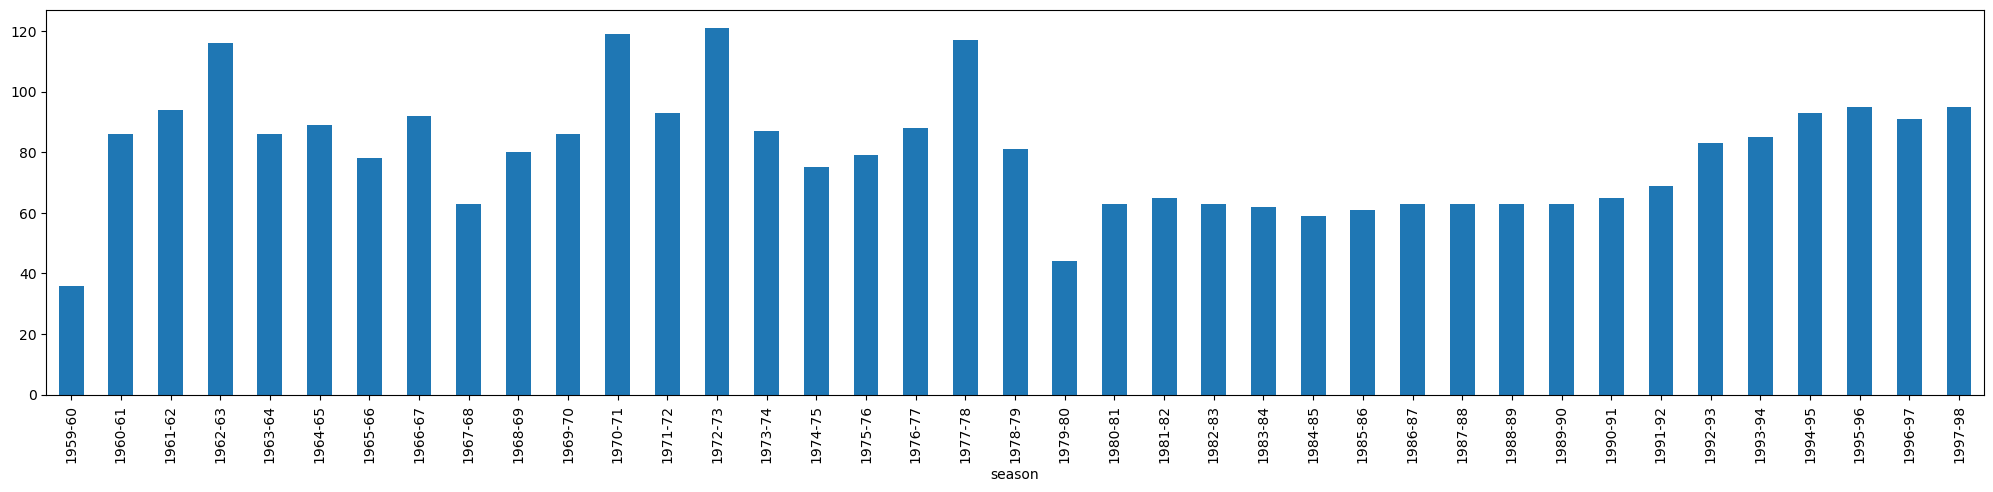

In [235]:
df[df['competition'] == 'CWC'].groupby('season').size().plot.bar(figsize=(25,5))

In [236]:
df[df['season'] == '1955-56']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season
52,UCL,1956-08-01,4-3,Borussia Dortmund,West Germany,Borussia_Dortmund,Spora Luxembourg,Luxembourg,CA_Spora_Luxembourg,"Stadion Rote Erde, Dortmund",preliminary round,20000.0,NaT,1956%E2%80%9357 European Cup,1955-56
53,UCL,1956-08-26,3-1,Dinamo București,Romania,FC_Dinamo_Bucure%C8%99ti,Galatasaray,Turkey,Galatasaray_S.K._(football),"Stadionul August 23, Bucharest",preliminary round,85000.0,NaT,1956%E2%80%9357 European Cup,1955-56
54,UCL,1956-09-12,0-2,Anderlecht,Belgium,R.S.C._Anderlecht,Manchester United,England,Manchester_United_F.C.,"Stade Émile Versé, Anderlecht, Brussels",preliminary round,33000.0,NaT,1956%E2%80%9357 European Cup,1955-56
55,UCL,1956-09-12,4-0,Slovan UNV Bratislava,Czechoslovakia,%C5%A0K_Slovan_Bratislava,CWKS Warsaw,Poland,Legia_Warsaw,"Tehelné pole, Bratislava",preliminary round,25000.0,NaT,1956%E2%80%9357 European Cup,1955-56
56,UCL,1956-09-19,1-1,AGF Aarhus,Denmark,Aarhus_Gymnastikforening,Nice,France,OGC_Nice,"Idrætsparken, Copenhagen",preliminary round,12900.0,NaT,1956%E2%80%9357 European Cup,1955-56
57,UCL,1956-09-20,1-2,Porto,Portugal,FC_Porto,Athletic Bilbao,Spain,Athletic_Bilbao,"Estádio das Antas, Porto",preliminary round,35000.0,NaT,1956%E2%80%9357 European Cup,1955-56
58,UCL,1956-09-06,2-1,Spora Luxembourg,Luxembourg,CA_Spora_Luxembourg,Borussia Dortmund,West Germany,Borussia_Dortmund,"Stade Municipal, Luxembourg City",preliminary round,7000.0,NaT,1956%E2%80%9357 European Cup,1955-56
59,UCL,1956-09-19,2-0,CWKS Warsaw,Poland,Legia_Warsaw,Slovan UNV Bratislava,Czechoslovakia,%C5%A0K_Slovan_Bratislava,"Stadion Wojska Polskiego, Warsaw",preliminary round,40000.0,NaT,1956%E2%80%9357 European Cup,1955-56
60,UCL,1956-09-26,3-2,Athletic Bilbao,Spain,Athletic_Bilbao,Porto,Portugal,FC_Porto,"San Mamés, Bilbao",preliminary round,34705.0,NaT,1956%E2%80%9357 European Cup,1955-56
61,UCL,1956-09-26,10-0,Manchester United,England,Manchester_United_F.C.,Anderlecht,Belgium,R.S.C._Anderlecht,"Maine Road, Manchester",preliminary round,43635.0,NaT,1956%E2%80%9357 European Cup,1955-56


In [237]:
df.sort_values(['homeTeam', 'awayTeam', 'score', 'season', 'date'], ascending=[True, True, True, True, False], inplace=True)

In [238]:
df[df['date'].isnull()]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season
1894,CWC,NaT,3-0,1. FC Köln,West Germany,1._FC_K%C3%B6ln,ADO Den Haag,Netherlands,ADO_Den_Haag,NaN,second round,NaN,1968-11-13,1968%E2%80%9369 European Cup Winners%27 Cup,1967-68
1909,CWC,NaT,2-2,1. FC Köln,West Germany,1._FC_K%C3%B6ln,Barcelona,Spain,FC_Barcelona,NaN,semi-finals,NaN,1969-05-21,1968%E2%80%9369 European Cup Winners%27 Cup,1967-68
1876,CWC,NaT,3-0,1. FC Köln,West Germany,1._FC_K%C3%B6ln,Girondins Bordeaux,France,Girondins_Bordeaux,NaN,first round,NaN,1968-09-18,1968%E2%80%9369 European Cup Winners%27 Cup,1967-68
1903,CWC,NaT,2-1,1. FC Köln,West Germany,1._FC_K%C3%B6ln,Randers,Denmark,Randers_Freja,NaN,quarter-finals,NaN,1969-02-19,1968%E2%80%9369 European Cup Winners%27 Cup,1967-68
3919,CWC,NaT,2-0,1. FC Lokomotive Leipzig,East Germany,1._FC_Lokomotive_Leipzig,Hearts,Scotland,Heart_of_Midlothian_F.C.,NaN,first round,NaN,1976-09-15,1976%E2%80%9377 European Cup Winners%27 Cup,1975-76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,CWC,NaT,3-0,Śląsk Wrocław,Poland,%C5%9Al%C4%85sk_Wroc%C5%82aw,Bohemian F.C.,Republic of Ireland,Bohemian_F.C.,NaN,second round,NaN,1976-10-20,1976%E2%80%9377 European Cup Winners%27 Cup,1975-76
3922,CWC,NaT,2-0,Śląsk Wrocław,Poland,%C5%9Al%C4%85sk_Wroc%C5%82aw,Floriana,Malta,Floriana_F.C.,NaN,first round,NaN,1976-09-15,1976%E2%80%9377 European Cup Winners%27 Cup,1975-76
3957,CWC,NaT,0-0,Śląsk Wrocław,Poland,%C5%9Al%C4%85sk_Wroc%C5%82aw,Napoli,Italy,S.S.C._Napoli,NaN,quarter-finals,NaN,1977-03-02,1976%E2%80%9377 European Cup Winners%27 Cup,1975-76
1331,CWC,NaT,0-2,Știința Cluj,Romania,FC_Universitatea_Cluj,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,NaN,second round,NaN,1965-11-17,1965%E2%80%9366 European Cup Winners%27 Cup,1964-65


In [239]:
def short_name(name):
    try:
        return name[0:4]
    except:
        return name

In [240]:
df['homeTeamShort'] = df['homeTeam'].apply(lambda x: short_name(x))
df['awayTeamShort'] = df['awayTeam'].apply(lambda x: short_name(x))

In [241]:
mask = (df['competition'] == 'CWC') & df.duplicated(subset=['season','competition','homeTeamShort', 'awayTeamShort', 'score'], keep='first')

In [242]:
df = df[~mask]

<Axes: xlabel='season'>

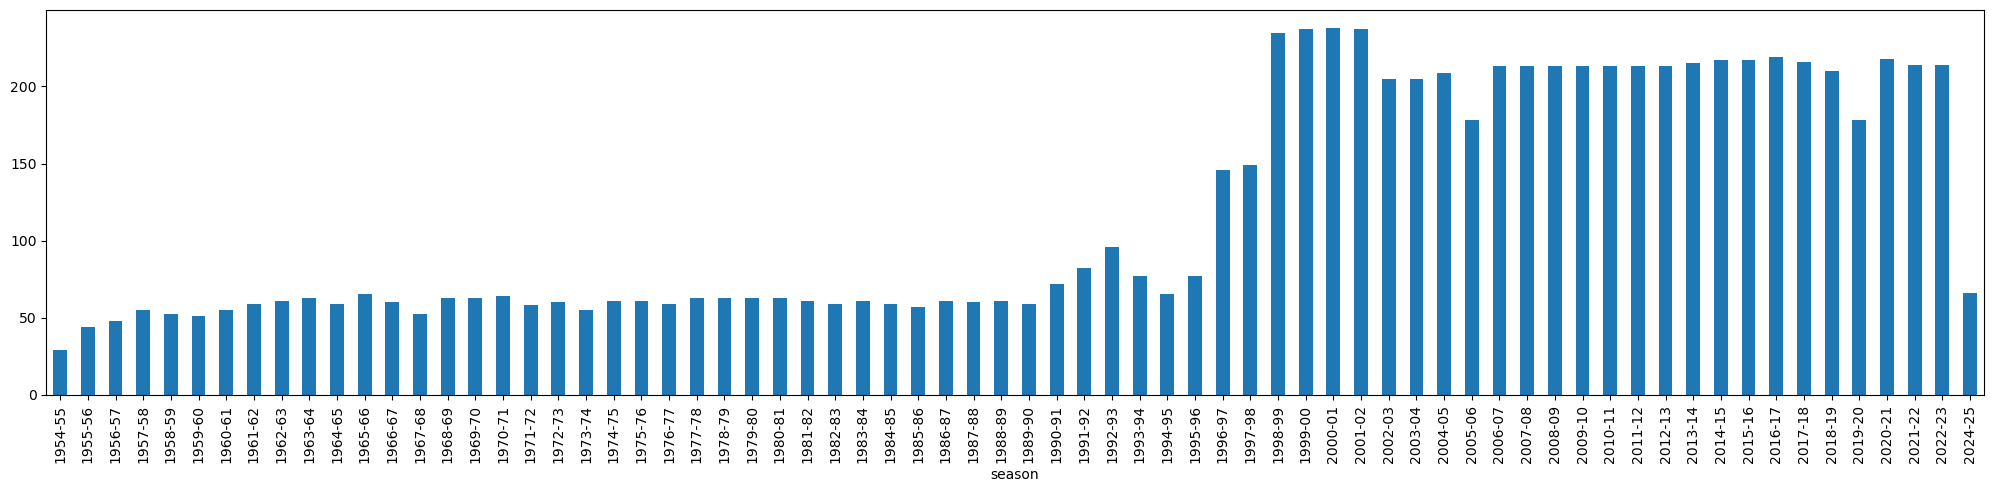

In [243]:
df[df['competition'] == 'UCL'].groupby('season').size().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

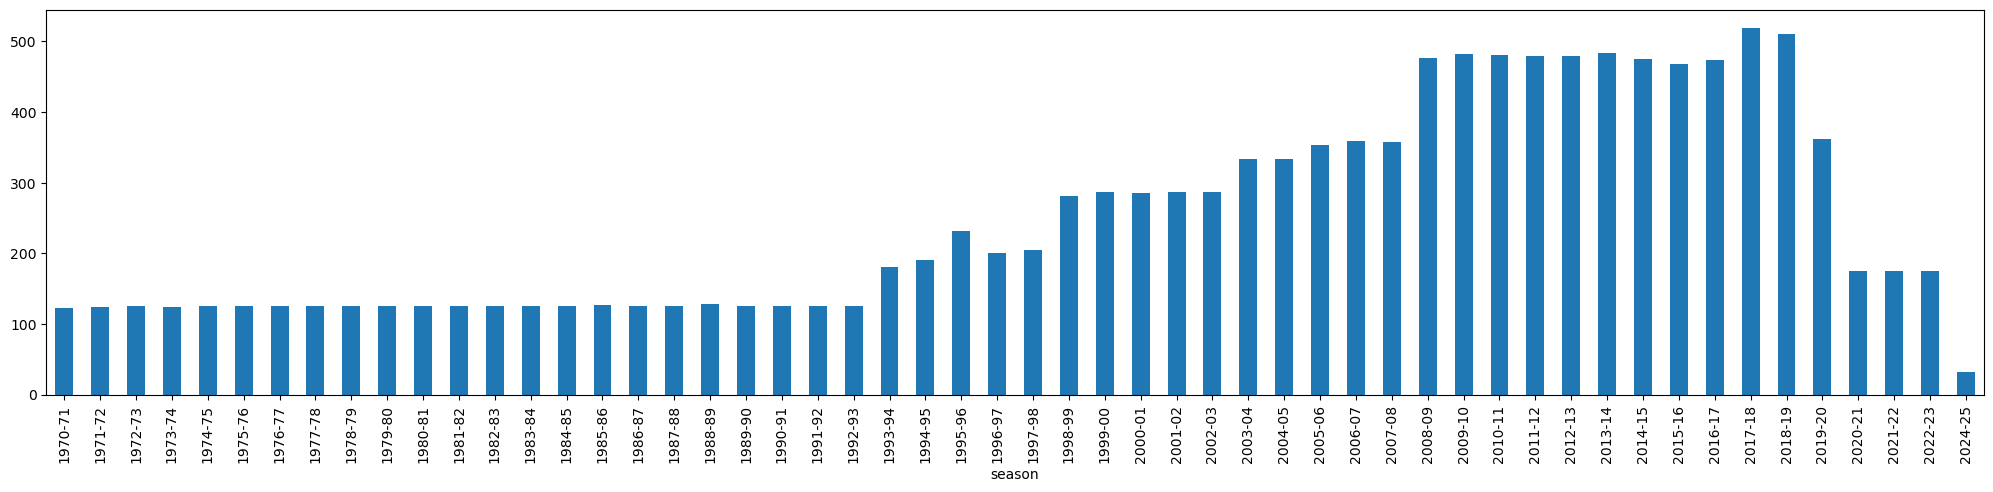

In [244]:
df[df['competition'] == 'EL'].groupby('season').size().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

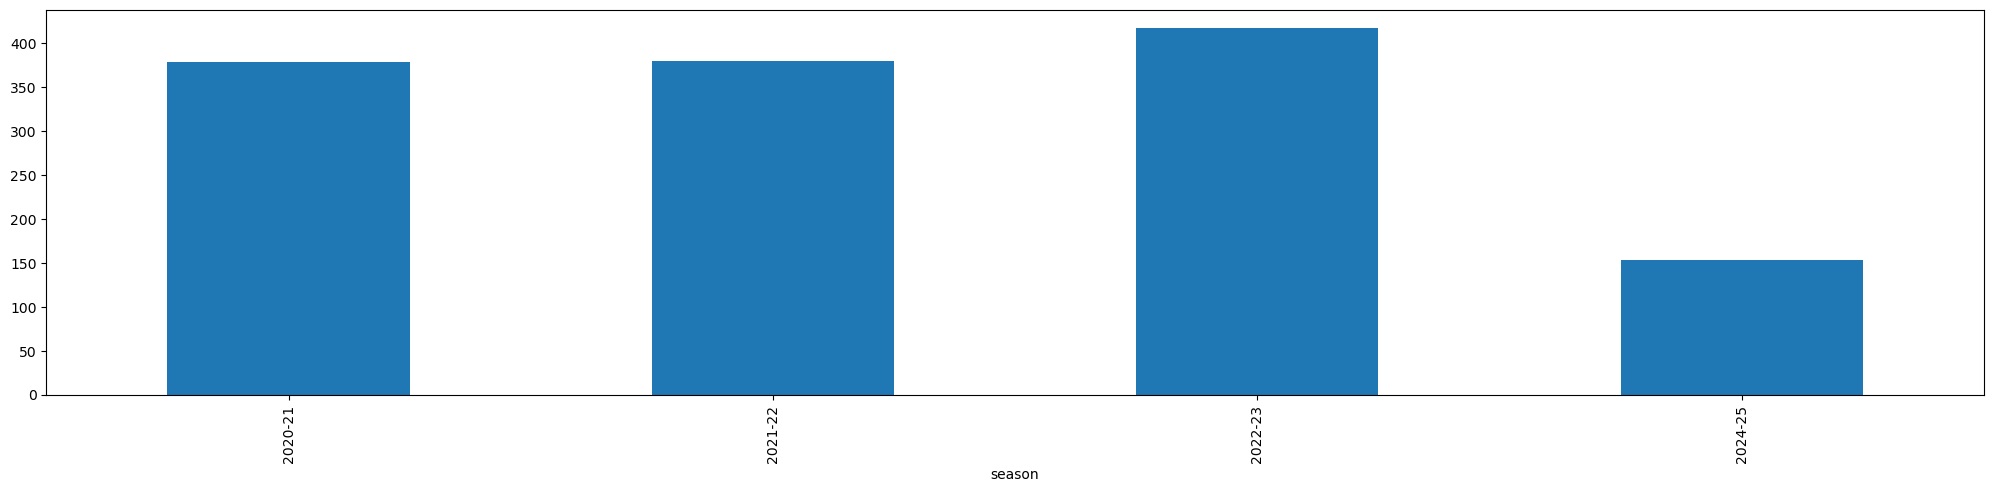

In [245]:
df[df['competition'] == 'UECL'].groupby('season').size().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

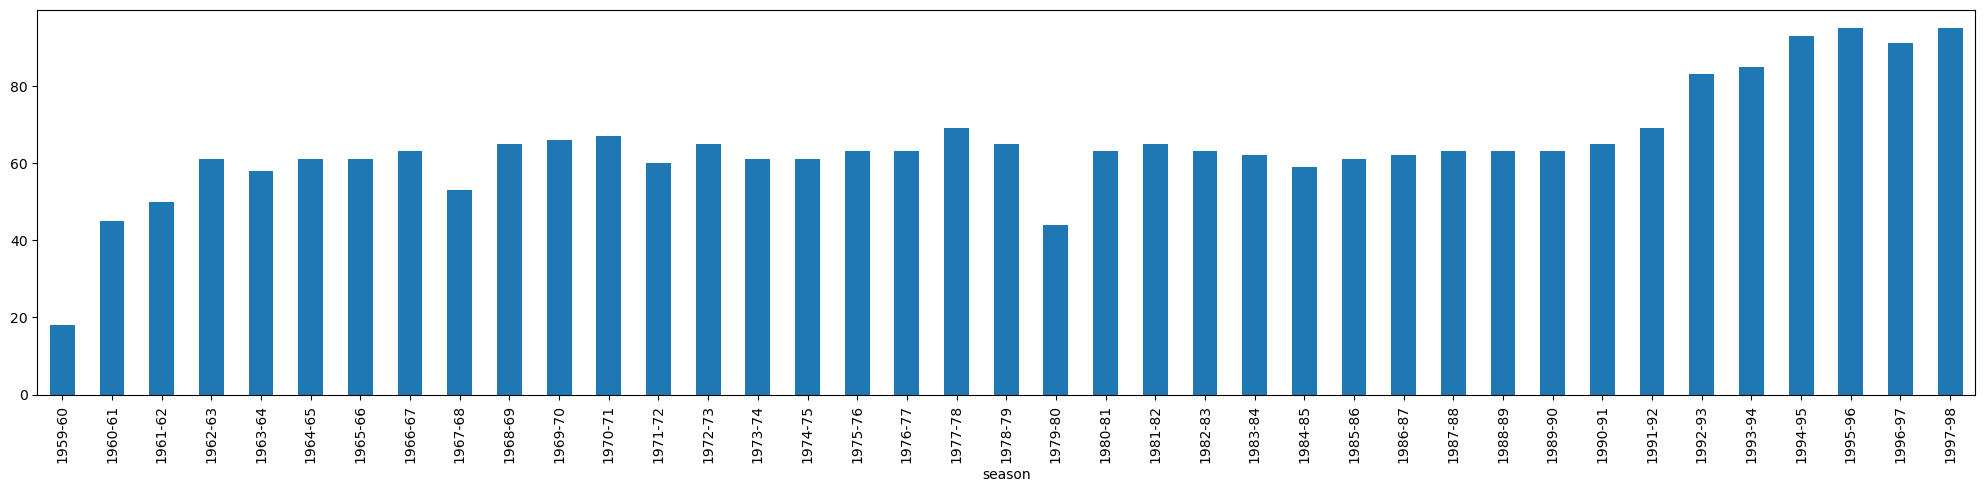

In [246]:
df[df['competition'] == 'CWC'].groupby('season').size().plot.bar(figsize=(25,5))

In [247]:
df[(df['competition'] == 'CWC') & (df['season'] == '1977-78')]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,homeTeamShort,awayTeamShort
4476,CWC,1979-03-07,2-1,1. FC Magdeburg,East Germany,1._FC_Magdeburg,Baník Ostrava,Czechoslovakia,FC_Ban%C3%ADk_Ostrava,"Ernst Grube Stadium, Magdeburg",quarter-finals,12000.0,NaT,1978%E2%80%9379 European Cup Winners%27 Cup,1977-78,1. F,Baní
4463,CWC,1978-10-18,1-0,1. FC Magdeburg,East Germany,1._FC_Magdeburg,Ferencvárosi TC,Hungary,Ferencv%C3%A1rosi_TC,"Ernst Grube Stadium, Magdeburg",second round,22000.0,NaT,1978%E2%80%9379 European Cup Winners%27 Cup,1977-78,1. F,Fere
4453,CWC,1978-09-27,4-0,1. FC Magdeburg,East Germany,1._FC_Magdeburg,Valur,Iceland,Valur_(men%27s_football),"Ernst Grube Stadium, Magdeburg",first round,14000.0,NaT,1978%E2%80%9379 European Cup Winners%27 Cup,1977-78,1. F,Valu
4456,CWC,1978-09-27,0-1,APOEL,Cyprus,APOEL_FC,Shamrock Rovers,Republic of Ireland,Shamrock_Rovers_F.C.,"Makario Stadium, Nicosia",first round,15000.0,NaT,1978%E2%80%9379 European Cup Winners%27 Cup,1977-78,APOE,Sham
4452,CWC,1978-09-27,4-0,AS Nancy,France,AS_Nancy_Lorraine,BK Frem,Denmark,Boldklubben_Frem,"Stade Marcel Picot, Tomblaine",first round,14508.0,NaT,1978%E2%80%9379 European Cup Winners%27 Cup,1977-78,AS N,BK F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446,CWC,1978-09-12,1-0,Union Luxembourg,Luxembourg,Union_Luxembourg,FK Bodø/Glimt,Norway,FK_Bod%C3%B8/Glimt,"Stade Achille Hammerel, Luxembourg City",first round,1800.0,NaT,1978%E2%80%9379 European Cup Winners%27 Cup,1977-78,Unio,FK B
4434,CWC,1978-09-13,3-4,Universitatea Craiova,Romania,CS_Universitatea_Craiova,Fortuna Düsseldorf,West Germany,Fortuna_D%C3%BCsseldorf,"Stadionul Central, Craiova",first round,15000.0,NaT,1978%E2%80%9379 European Cup Winners%27 Cup,1977-78,Univ,Fort
4438,CWC,1978-09-13,1-1,Valur,Iceland,Valur_(men%27s_football),1. FC Magdeburg,East Germany,1._FC_Magdeburg,"Laugardalsvöllur, Reykjavík",first round,5600.0,NaT,1978%E2%80%9379 European Cup Winners%27 Cup,1977-78,Valu,1. F
4447,CWC,1978-09-27,2-0,Wrexham,Wales,Wrexham_A.F.C.,NK Rijeka,Socialist Federal Republic of Yugoslavia,HNK_Rijeka,"Racecourse Ground, Wrexham",first round,10400.0,NaT,1978%E2%80%9379 European Cup Winners%27 Cup,1977-78,Wrex,NK R


In [248]:
def join_dates(row):
    if row['date'] != None:
        return row['date']
    else:
        return row['estimatedDate']

In [249]:
df['working_date'] = df.apply(lambda row: join_dates(row), axis=1)

In [250]:
df = df.sort_values(by=['season','competition','date','working_date'])

In [251]:
df = df.drop(columns=['working_date','homeTeamShort','awayTeamShort'])

In [252]:
df.to_csv(os.path.join('data','matches.csv'), index=False)